Mounting Drive


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Flat foot detection model**

Importing Libraries

In [34]:
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Cropping Images 

In [35]:
# Function to crop image using bounding box
def crop_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.convertScaleAbs(gray)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    cropped_img = img[y:y+h, x:x+w]
    cropped_img = cv2.resize(cropped_img, img_size)
    return cropped_img

Data Generators

In [36]:
# Set up the data generators
train_dir = '/content/drive/MyDrive/Hack the tank/Train2'
test_dir = '/content/drive/MyDrive/Hack the tank/Test'
img_size = (224, 224)
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_image)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_image)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=32, class_mode='categorical')

Found 75 images belonging to 3 classes.
Found 44 images belonging to 3 classes.


Loading Preprocessed Model

In [37]:
# Load the ResNet50 model without the top layers
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the pre-trained layers
for layer in resnet_model.layers:
    layer.trainable = False

Classification Layers


In [38]:
# Add new classification layers
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

**Final Model**

In [39]:
# Create the final model
model = Model(inputs=resnet_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def lr_schedule(epoch):
        return 0.0001

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/10
3/3 [==============================] - 39s 16s/step - loss: 1.6755 - accuracy: 0.3200 - val_loss: 0.9558 - val_accuracy: 0.6818
Epoch 2/10
3/3 [==============================] - 24s 8s/step - loss: 1.7986 - accuracy: 0.4133 - val_loss: 1.2290 - val_accuracy: 0.2273
Epoch 3/10
3/3 [==============================] - 24s 11s/step - loss: 1.6230 - accuracy: 0.3867 - val_loss: 1.1936 - val_accuracy: 0.2273
Epoch 4/10
3/3 [==============================] - 24s 11s/step - loss: 1.6846 - accuracy: 0.2533 - val_loss: 0.9144 - val_accuracy: 0.6818
Epoch 5/10
3/3 [==============================] - 24s 9s/step - loss: 1.5267 - accuracy: 0.3733 - val_loss: 0.8479 - val_accuracy: 0.6818
Epoch 6/10
3/3 [==============================] - 24s 9s/step - loss: 1.2721 - accuracy: 0.4267 - val_loss: 0.9943 - val_accuracy: 0.2273
Epoch 7/10
3/3 [==============================] - 24s 9s/step - loss: 1.4104 - accuracy: 0.3733 - val_loss: 0.9853 - val_accuracy: 0.2273
Epoch 8/10
3/3 [===============

In [43]:
from tensorflow.keras.models import load_model


model.save('/content/drive/MyDrive/Hack the tank/model.h5')  # save the model to disk

# load saved model and make predictions
# loaded_model = load_model('/content/drive/MyDrive/Hack the tank/model.h5')  # load the saved model

# model.save('/content/drive/MyDrive/Hack the tank/model')

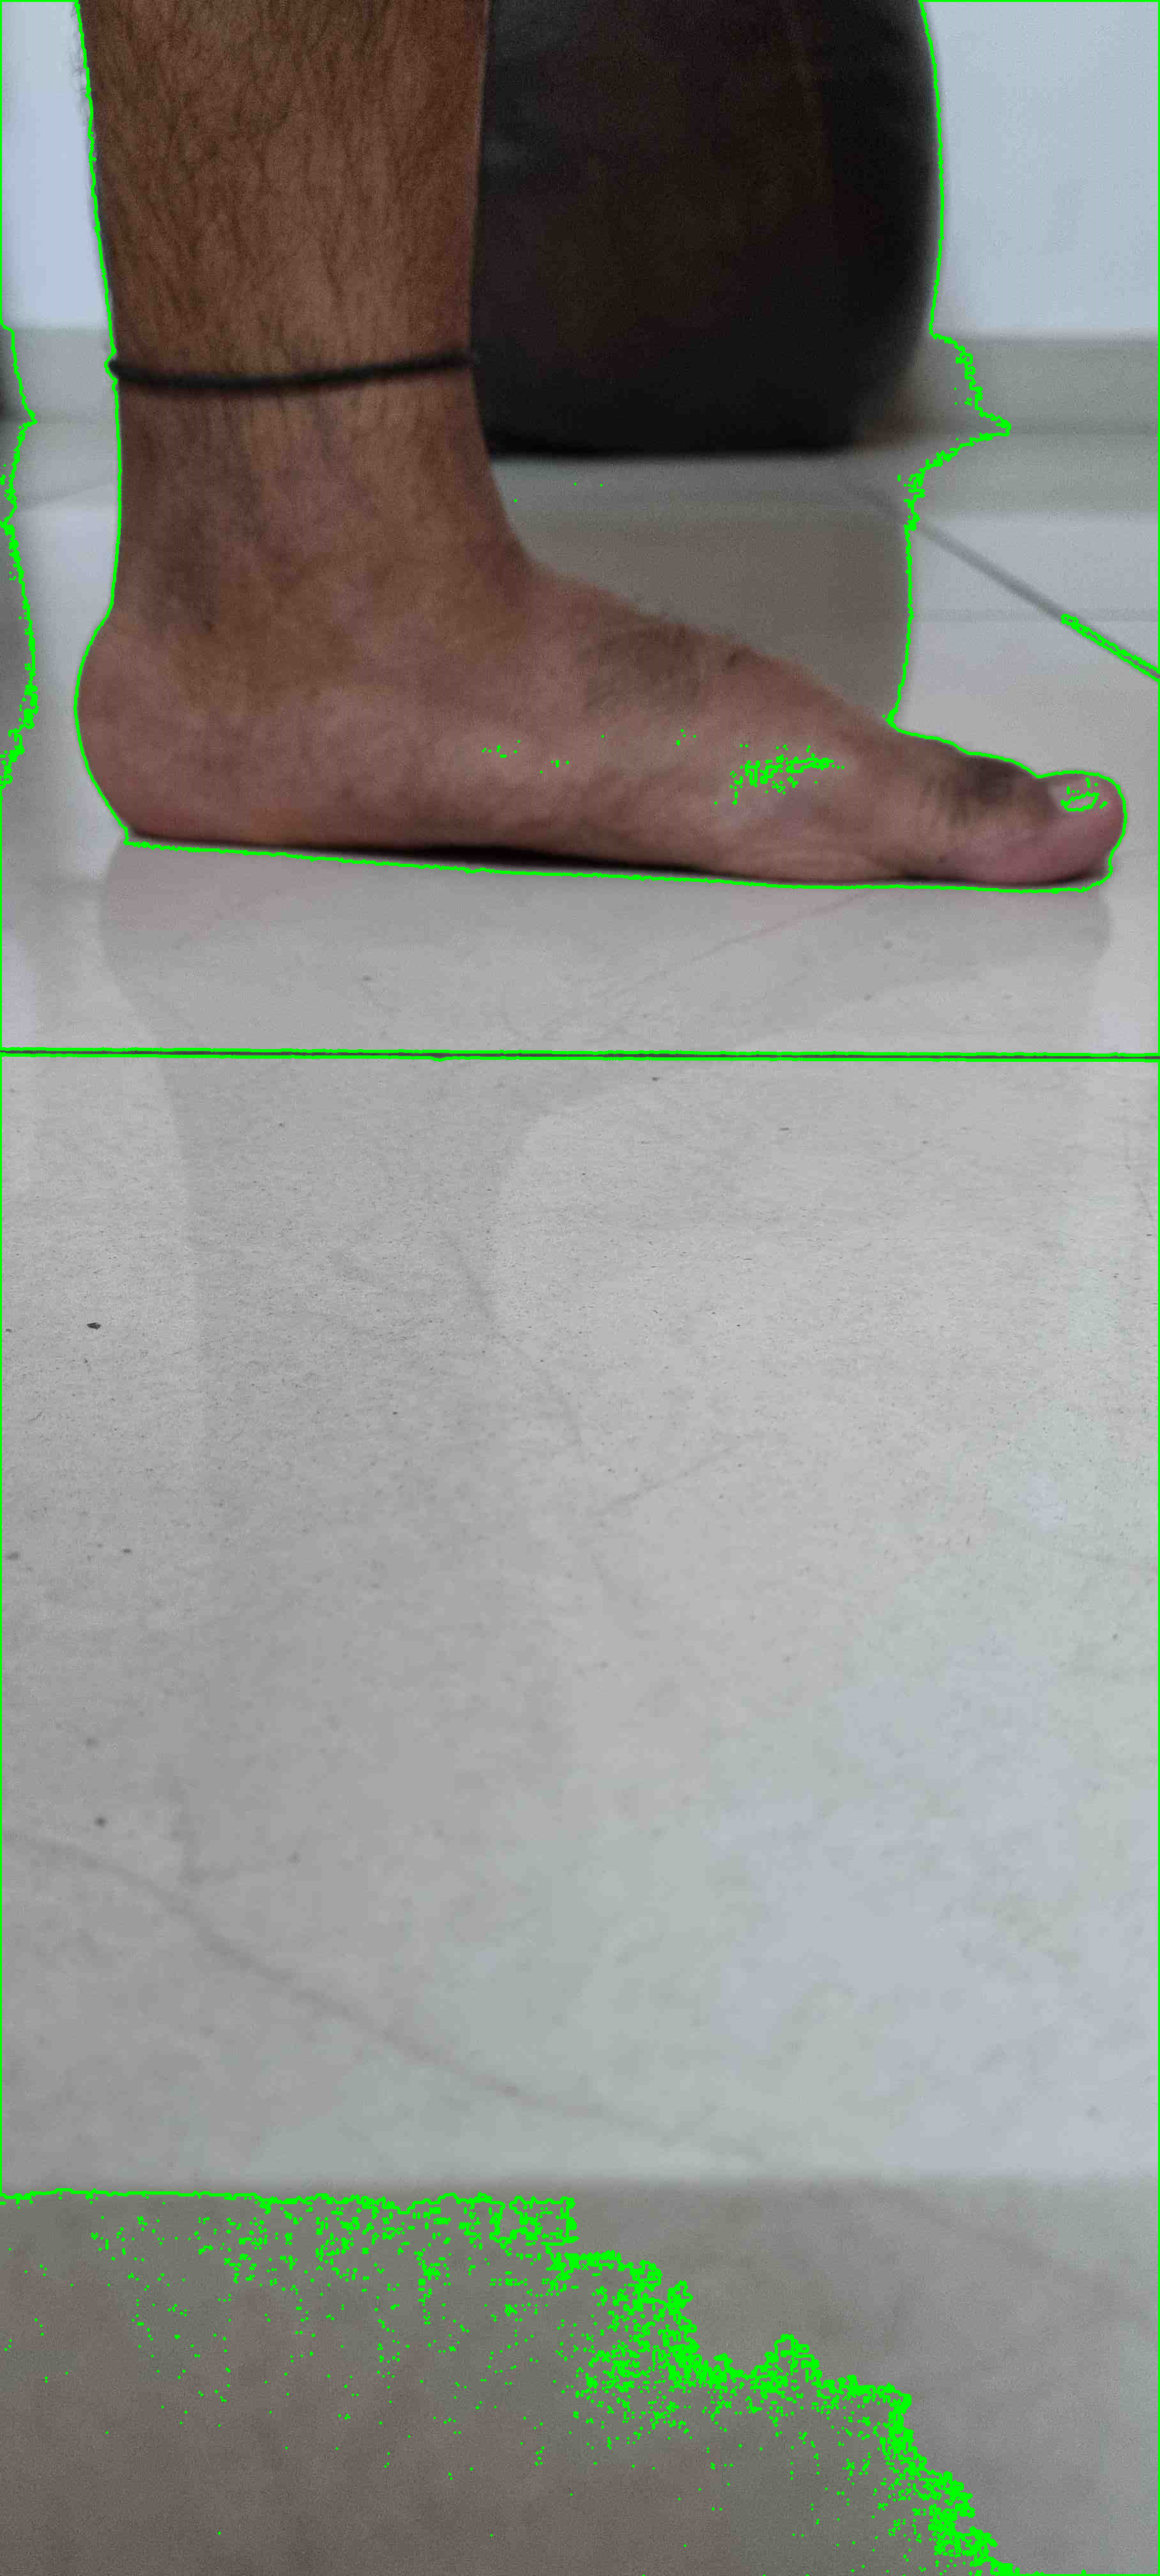

In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/Final/low/20220621_144230.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image to get a binary image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0,255,0), 3)

# Display the image with contours
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()